# A complete data analysis and machine learning for game ratings data.

In [1]:
# --- Part 1: Project Setup and Data Loading ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import os

# Assume the CSV file is in the same directory.
# Creating a sample DataFrame for this example.
# In a real project, you would uncomment the following line and load your data:
# df = pd.read_csv("gameda.csv")
df = pd.read_csv(r"C:\\Users\\HP\\Desktop\\game_eda\\game_ratings.csv")
df

# Display a concise summary of the DataFrame
print("Initial DataFrame Info:")
df.info()

Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Game Name  101 non-null    object 
 1   Developer  101 non-null    object 
 2   Genre      101 non-null    object 
 3   Rating     101 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [2]:
# --- Part 2: Data Cleaning and Preprocessing ---
print("Checking for missing values:")
print(df.isnull().sum())
print("-" * 30)

print("Checking for duplicates:")
duplicate_rows = df.duplicated().sum()
if duplicate_rows > 0:
    print(f"Found {duplicate_rows} duplicate rows. Removing them.")
    df.drop_duplicates(inplace=True)
else:
    print("No duplicate rows found.")

Checking for missing values:
Game Name    0
Developer    0
Genre        0
Rating       0
dtype: int64
------------------------------
Checking for duplicates:
No duplicate rows found.


Descriptive statistics for Rating:
count    101.000000
mean       4.398020
std        0.175488
min        4.100000
25%        4.300000
50%        4.400000
75%        4.500000
max        4.900000
Name: Rating, dtype: float64
------------------------------


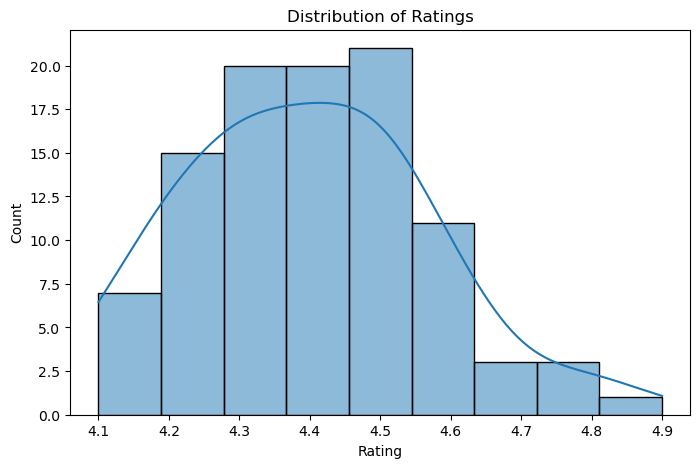

In [3]:
# --- Part 3: Exploratory Data Analysis (EDA) and Visualization ---

print("Descriptive statistics for Rating:")
print(df['Rating'].describe())
print("-" * 30)

# Distribution of `Rating`
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], kde=True, bins=9)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_2372\1855623073.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="rocket")


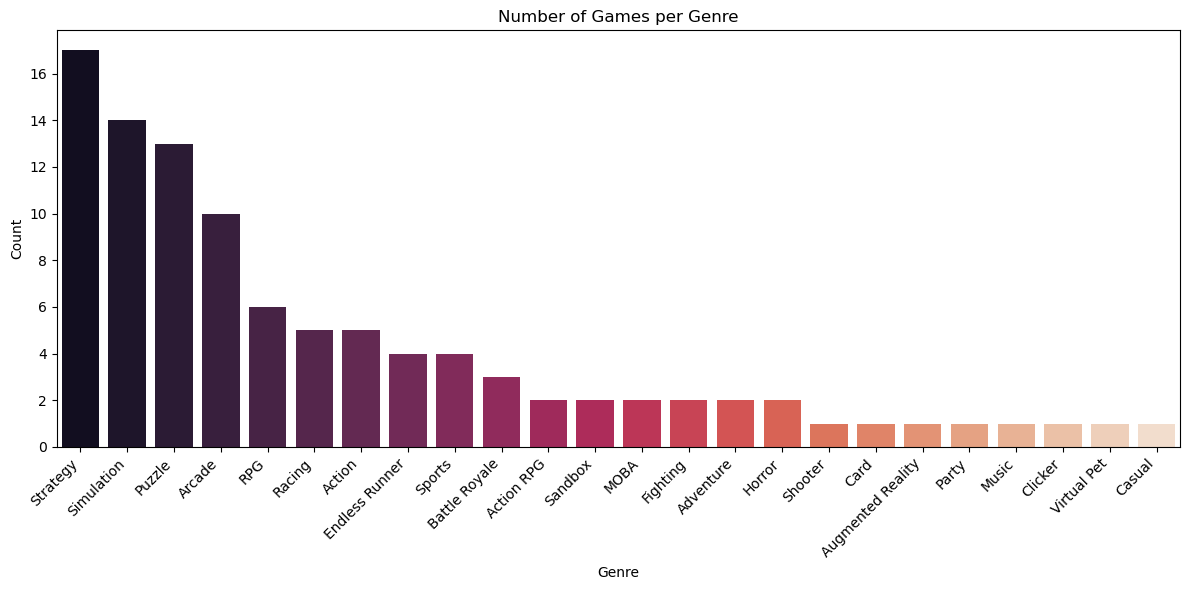

In [4]:
# Number of games per genre
genre_counts = df['Genre'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="rocket")
plt.xticks(rotation=45, ha='right')
plt.title("Number of Games per Genre")
plt.ylabel("Count")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_2372\334440543.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_per_genre.index, y=avg_rating_per_genre.values, palette="viridis")


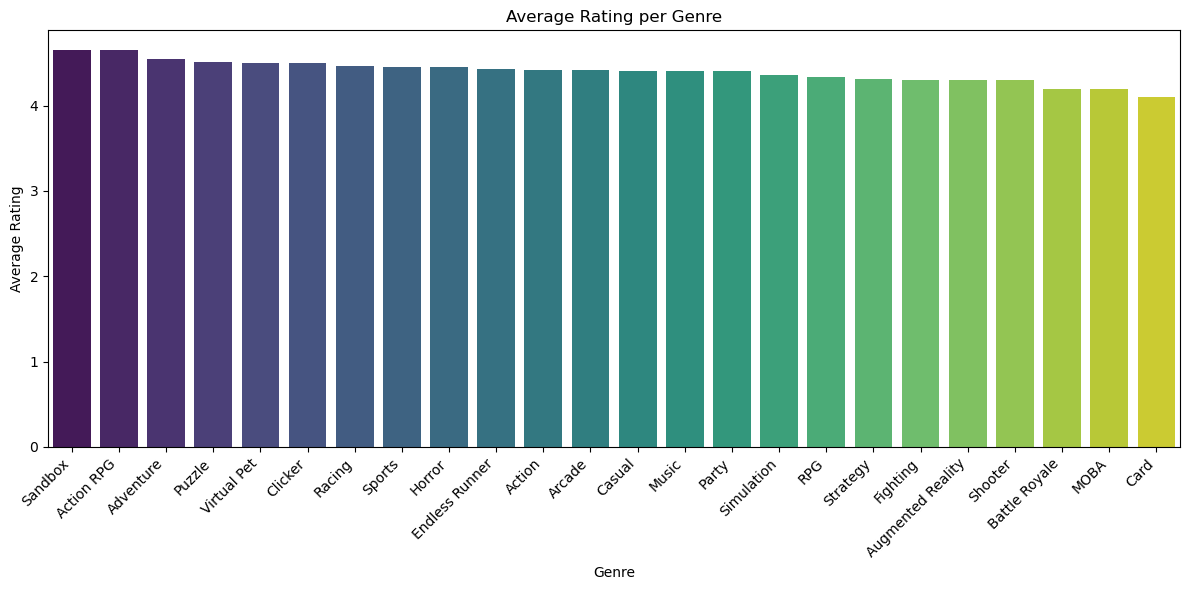

In [5]:
# Average rating per genre
avg_rating_per_genre = df.groupby('Genre')['Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_per_genre.index, y=avg_rating_per_genre.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("Average Rating per Genre")
plt.ylabel("Average Rating")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()

In [6]:
# --- Part 4: Feature Engineering for Machine Learning ---
print("Performing One-Hot Encoding on categorical features...")
X = pd.get_dummies(df[['Genre', 'Developer']], drop_first=True)
y = df['Rating']

print("Features (X) after encoding:")
print(X.head())

Performing One-Hot Encoding on categorical features...
Features (X) after encoding:
   Genre_Action RPG  Genre_Adventure  Genre_Arcade  Genre_Augmented Reality  \
0             False            False         False                    False   
1             False            False         False                    False   
2             False            False         False                    False   
3             False            False         False                     True   
4             False            False         False                    False   

   Genre_Battle Royale  Genre_Card  Genre_Casual  Genre_Clicker  \
0                False       False         False          False   
1                False       False         False          False   
2                False       False         False          False   
3                False       False         False          False   
4                 True       False         False          False   

   Genre_Endless Runner  Genre_Fightin

In [7]:
# --- Part 5: Model Building and Evaluation ---
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")

# Initializing and training a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model training complete.")

Training set size: 80 samples
Testing set size: 21 samples
Model training complete.


In [8]:
# Making predictions on the test data
y_pred = model.predict(X_test)
print("Model predictions on test set:")
print(y_pred)

# Evaluating the model's performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Model predictions on test set:
[4.368      4.352      4.368      4.4075     4.35683333 4.35683333
 4.36683333 4.366      4.404      4.47       4.418      4.249
 4.368      4.476      4.286      4.333      4.438      4.3865
 4.3915     4.388      4.3865    ]
Model Evaluation:
Mean Absolute Error (MAE): 0.14
R-squared (R²): 0.09
